# ***Exploratory Data Analysis***
## *Social Network Ads*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     \ 25.9 MB 55 kB/s
     |████████████████████████████████| 10.9 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 49.9 MB/s 
     |████████████████████████████████| 102 kB 15.8 MB/s 
     |████████████████████████████████| 690 kB 56.1 MB/s 
     |████████████████████████████████| 4.7 MB 50.3 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 812 kB 48.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=9edec43f0589da269cf04e02507f1af7d2db239f9916726c8c493b4bd713a3f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7bu1pnl0/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0f756f319c764ad9a5d1d0da0ac080d2194f8c37f5fbd59ca79ad767c8326936
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 4.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df = pd.read_csv(r'gdrive/My Drive/Colab Notebooks/floxus-workshop/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,3.730000e+02,370.000000,384.000000,389.000000
mean,1.569248e+07,37.935135,69158.854167,0.354756
std,7.122830e+04,10.510859,34155.202131,0.479055
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562974e+07,30.000000,43000.000000,0.000000
50%,1.569483e+07,37.000000,68500.000000,0.000000
75%,1.575045e+07,46.000000,87000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file('profiling.html')
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Find missing values in the dataset

df.columns[df.isnull().any()]

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.isnull().sum()

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

*Missing values can be filled by:*

1.   *Mode (categorical data/classes) fills the values by adding the most common values*
2.   *Median (continous data) for numerical data*

In [ ]:
# Dropping out missing values from User ID becuase it uniquely identifies a user and cannot be repeated

df.dropna(subset=['User ID'], inplace=True)
df.isnull().sum()

User ID            0
Gender             9
Age                8
EstimatedSalary    5
Purchased          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df.isnull().sum()

User ID            0
Gender             9
Age                0
EstimatedSalary    5
Purchased          0
dtype: int64

In [ ]:
# Filling out missing values in Gender column on the basis of the most repeated value

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    5
Purchased          0
dtype: int64

In [ ]:
# Filling out missing values in EstimatedSalary column using interpolation

df['EstimatedSalary'].interpolate(subset=['EstimatedSalary'], inplace=True)
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Filling out missing values in Purchased column on the basis of the most repeated value

df['Purchased'].fillna(df['Purchased'].mode()[0], inplace=True)
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Purchased'].unique()

array([0., 1.])

In [ ]:
df['EstimatedSalary'].unique()

array([ 19000.        ,  20000.        ,  43000.        ,  57000.        ,
        76000.        ,  58000.        ,  84000.        , 150000.        ,
        80000.        ,  25000.        ,  26000.        ,  28000.        ,
        29000.        ,  22000.        ,  49000.        ,  41000.        ,
        23000.        ,  30000.        ,  18000.        ,  74000.        ,
       137000.        ,  16000.        ,  44000.        ,  90000.        ,
        27000.        ,  72000.        ,  31000.        ,  17000.        ,
        51000.        , 108000.        ,  15000.        ,  79000.        ,
        54000.        , 135000.        ,  89000.        ,  32000.        ,
        83000.        ,  55000.        ,  48000.        , 117000.        ,
        87000.        ,  66000.        , 120000.        ,  82000.        ,
        63000.        ,  68000.        , 113000.        , 112000.        ,
        52000.        ,  42000.        ,  88000.        ,  62000.        ,
       118000.        , 1

In [ ]:
df.Age.unique().size

43

In [ ]:
len(df.EstimatedSalary.unique())

117

In [ ]:
# Visualising the Number of Purchases by Each Gender in the Specific Age Groups

fig = px.bar(df, x='Age', y='Purchased', color='Gender')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Visualising the Purchases by Each Age Group Based on their Estimated Salaries

fig = px.bar(df, x='Age', y='EstimatedSalary', color='Purchased')
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Visualising the Total Purchases by Each Gender Based on their Age

fig = px.histogram(df, x='Gender', y='Purchased', color='Age', barmode='group', height=400)
fig.show()

For plotting charts:

*   matplotlib: does not have enough features to make charts visually attractive 
*   seaborn: visually attractive charts / wide variety
*   plotly: visually attractive and interactive charts



In [ ]:
# Visualising the Relationship between the Age and the Number of Purchases

fig = px.pie(df, values='Purchased', names='Age')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# Visualising the Relationship between Estimated Salary and Age on the Basis of the Number of Purchases

fig = px.scatter(df, x='EstimatedSalary', y='Age', color='Purchased', color_continuous_scale=px.colors.sequential.Bluered_r)
fig.show()

In [ ]:
# Visualising the Relationship between the Estimated Salary, Number of Purchases and the Age groups

fig = px.bar(df, x='Age', y='Purchased', hover_data=['Gender', 'EstimatedSalary'], color='EstimatedSalary', height=600, 
             color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Sorting the the Estimated Salaies from lowest to highest

df_train = df.sort_values(by='EstimatedSalary', ascending=True)


In [ ]:
df_train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
92,15809823.0,Male,26.0,15000.0,0.0
43,15792008.0,Male,30.0,15000.0,0.0
155,15610140.0,Female,31.0,15000.0,0.0
150,15679651.0,Female,26.0,15000.0,0.0
180,15685576.0,Male,26.0,16000.0,0.0


In [ ]:
df_train.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
168,15789815.0,Male,29.0,148000.0,1.0
103,15675949.0,Female,33.0,149000.0,1.0
240,15701537.0,Male,42.0,149000.0,1.0
7,15694829.0,Female,32.0,150000.0,1.0
211,15735878.0,Male,52.0,150000.0,1.0


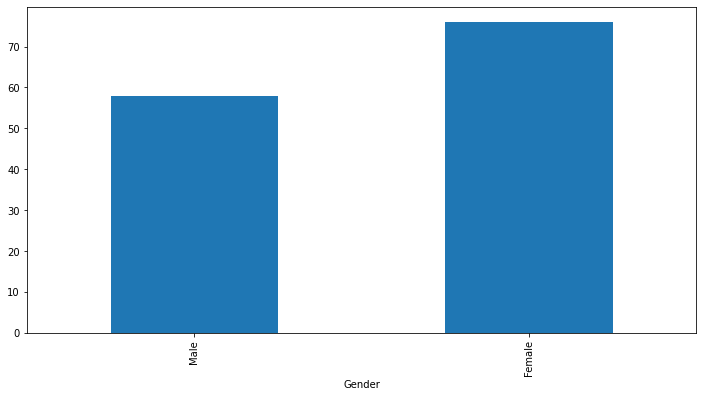

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize']=(12, 6)
Top10 = df_train.groupby('Gender')['Purchased'].sum().sort_values(ascending=True)
Top10[:10].plot(kind='bar')


Text(0, 0.5, 'Estimated Salary ($)')

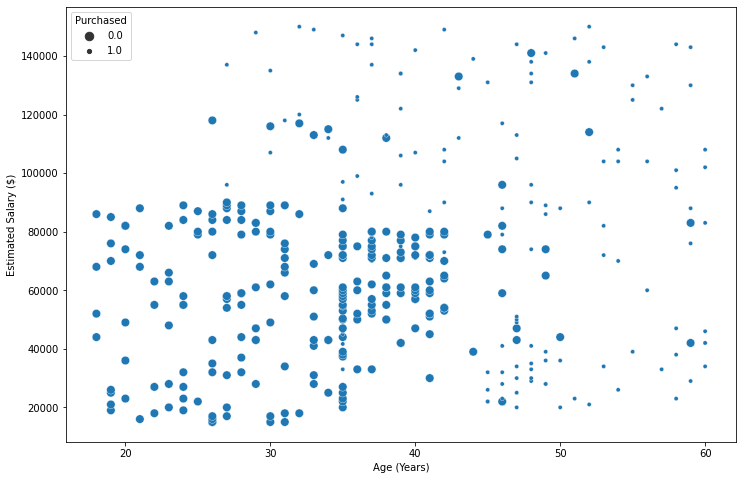

In [ ]:
# Visualising the Relationship between the Estimated Salary, Age and the Number of Purchases

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_train['Age'], y=df_train['EstimatedSalary'], size=df_train['Purchased'])
plt.xlabel('Age (Years)')
plt.ylabel('Estimated Salary ($)')

Text(0.5, 0, 'Estimated Salary ($)')

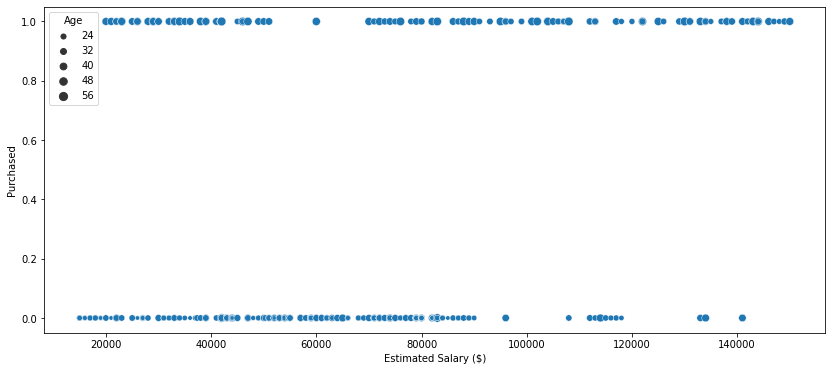

In [ ]:
# Visualising the Relationship between the Estimated Salary and the Number of Purchases
plt.figure(figsize=(14, 6))
sns.scatterplot(x=df_train['EstimatedSalary'], y=df_train['Purchased'], size=df_train['Age'])
plt.ylabel('Purchased')
plt.xlabel('Estimated Salary ($)')


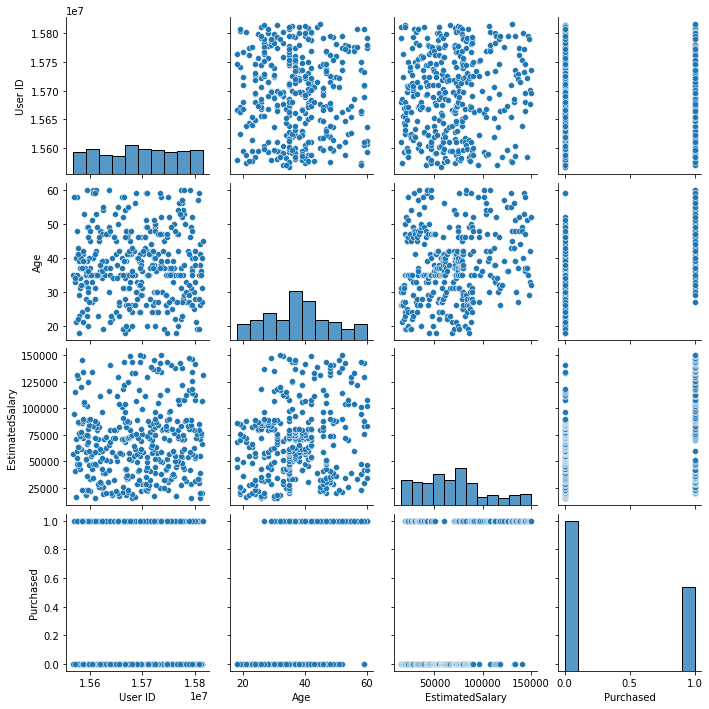

In [ ]:
sns.pairplot(df_train)

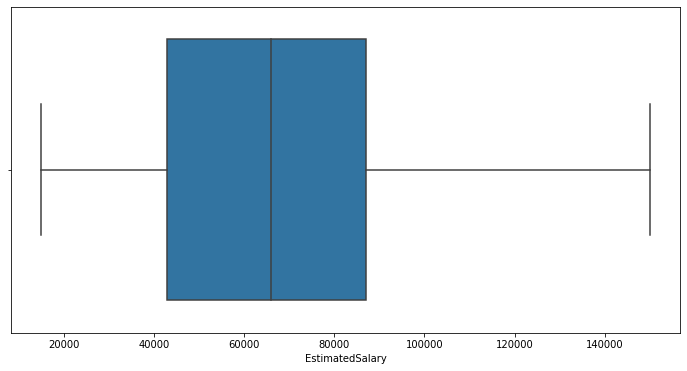

In [ ]:
# Range of Estimated Salaries

sns.boxplot(x=df_train['EstimatedSalary']) # To visualise the outliers

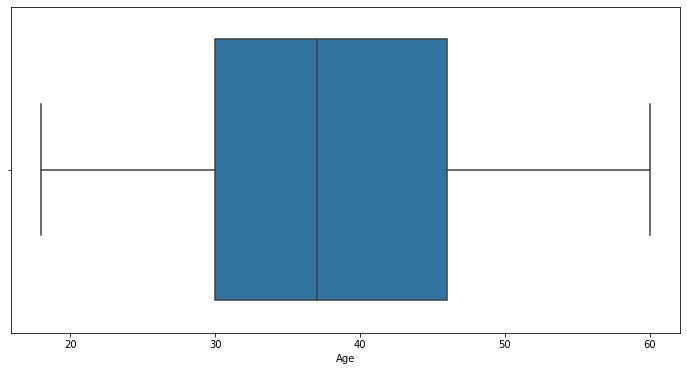

In [ ]:
# Range of Age

sns.boxplot(x=df_train['Age']) # To visualise the outliers

In [ ]:
# Users having the highest Estimated Salary

df[df['EstimatedSalary'] == df['EstimatedSalary'].max()]

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829.0,Female,32.0,150000.0,1.0
211,15735878.0,Male,52.0,150000.0,1.0


In [ ]:
# Users with the highest Age

df[df['Age'] == df['Age'].max()]

,User ID,Gender,Age,EstimatedSalary,Purchased
215,15779529.0,Female,60.0,108000.0,1.0
223,15593715.0,Male,60.0,102000.0,1.0
272,15791373.0,Male,60.0,42000.0,1.0
355,15606472.0,Male,60.0,34000.0,1.0
370,15611430.0,Female,60.0,46000.0,1.0
371,15774744.0,Male,60.0,83000.0,1.0
393,15635893.0,Male,60.0,42000.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



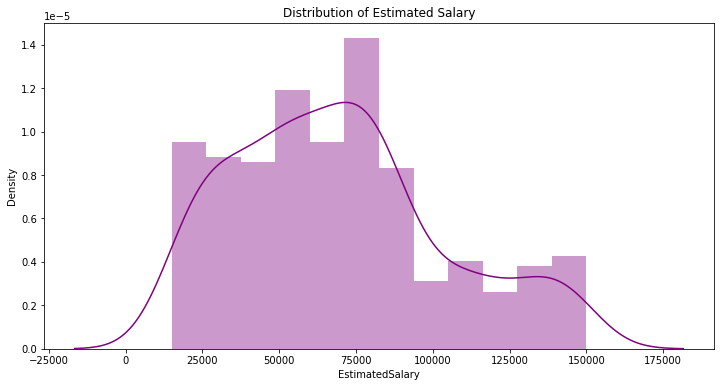

In [ ]:
# Distribution of the Estimated Salaries

plt.figure(figsize=(12,6))
plt.title('Distribution of Estimated Salary')
sns.distplot(df['EstimatedSalary'], color='purple')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



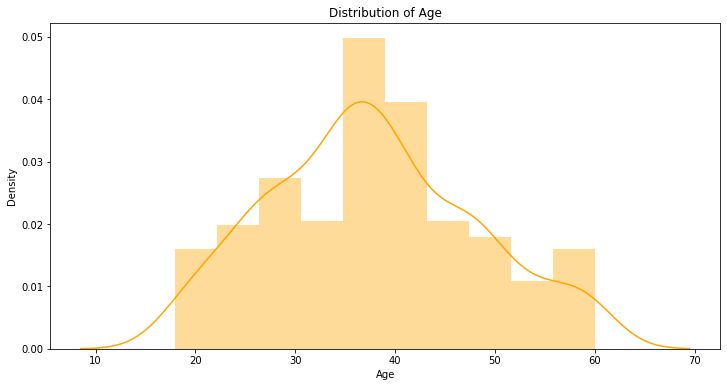

In [ ]:
# Distribution of the Age

plt.figure(figsize=(12,6))
plt.title('Distribution of Age')
sns.distplot(df['Age'], color='orange')
plt.show()